In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline



In [2]:
df_1 = pd.read_csv('CrawlData/fix_data_fpt.csv')
df_1.head()

,Company,CPU,RAM,Bus,SSD,HDD,GPU_name,GPU_ram,Screen,Độ phân giải,Weight,Price
0,Asus,Intel Core i5-10300H,8 GB,2933 MHz,512.0,0.0,NVIDIA GeForce GTX 1650Ti,4,15.6,1920 x 1080,2.30,22290000.0
1,Asus,AMD Ryzen 7-3750H,8 GB,2400 MHz,512.0,0.0,NVIDIA GeForce GTX 1650,4,15.6,1920 x 1080,2.20,19090000.0
2,Acer,AMD Ryzen 7-3750H,8 GB,2666 MHz,512.0,0.0,NVIDIA GeForce GTX 1650Ti,4,15.6,1920 x 1080,2.10,19790000.0
3,MSI,AMD Ryzen 5-4600H,8 GB,3200 MHz,512.0,0.0,AMD Radeon RX 5300M,3,15.6,1920 x 1080,1.96,19490000.0
4,Acer,AMD Ryzen 5-3550H,8 GB,2666 MHz,512.0,0.0,NVIDIA GeForce GTX 1650Ti,4,15.6,1920 x 1080,2.10,18790000.0


In [3]:
df_2 = pd.read_csv('CrawlData/clean_tgdd.csv', index_col='STT')
df_2

,Company,CPU,RAM,Bus,SSD,HDD,GPU_name,GPU_ram,Screen,Độ phân giải,Weight,Price
STT,,,,,,,,,,,,
0,Lenovo,Intel Core i3-1005G1,4 GB,2666 MHz,512,0.0,On board,0,15.6,1920 x 1080,1.80,11690000.0
1,Lenovo,Intel Core i5-1035G1,8 GB,2666 MHz,512,0.0,On board,0,14.0,1920 x 1080,1.60,14390000.0
2,Lenovo,Intel Core i5-1135G7,8 GB,3200 MHz,512,0.0,On board,0,15.6,1920 x 1080,1.66,17490000.0
3,Acer,Intel Core i3-8130U,4 GB,2400 MHz,256,0.0,On board,0,15.6,1920 x 1080,1.70,10790000.0
4,Acer,Intel Core i5-1035G1,8 GB,2400 MHz,512,0.0,On board,0,15.6,1920 x 1080,1.70,15190000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
159,Lenovo,Intel Core i7-8550U,8 GB,2666 MHz,256,0.0,On board,0,14.0,1920 x 1080,1.54,20490000.0
160,Dell,Intel Core i5-1135G7,8 GB,4267 MHz,256,0.0,On board,0,13.4,1920 x 1200,1.32,41490000.0
161,Lenovo,Intel Core i3-8145U,8 GB,2133 MHz,256,0.0,On board,0,14.0,1920 x 1080,1.60,15290000.0


In [4]:
df = pd.concat([df_1, df_2])
df.head()

,Company,CPU,RAM,Bus,SSD,HDD,GPU_name,GPU_ram,Screen,Độ phân giải,Weight,Price
0,Asus,Intel Core i5-10300H,8 GB,2933 MHz,512.0,0.0,NVIDIA GeForce GTX 1650Ti,4,15.6,1920 x 1080,2.30,22290000.0
1,Asus,AMD Ryzen 7-3750H,8 GB,2400 MHz,512.0,0.0,NVIDIA GeForce GTX 1650,4,15.6,1920 x 1080,2.20,19090000.0
2,Acer,AMD Ryzen 7-3750H,8 GB,2666 MHz,512.0,0.0,NVIDIA GeForce GTX 1650Ti,4,15.6,1920 x 1080,2.10,19790000.0
3,MSI,AMD Ryzen 5-4600H,8 GB,3200 MHz,512.0,0.0,AMD Radeon RX 5300M,3,15.6,1920 x 1080,1.96,19490000.0
4,Acer,AMD Ryzen 5-3550H,8 GB,2666 MHz,512.0,0.0,NVIDIA GeForce GTX 1650Ti,4,15.6,1920 x 1080,2.10,18790000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 163
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       362 non-null    object 
 1   CPU           362 non-null    object 
 2   RAM           362 non-null    object 
 3   Bus           362 non-null    object 
 4   SSD           362 non-null    float64
 5   HDD           362 non-null    float64
 6   GPU_name      362 non-null    object 
 7   GPU_ram       362 non-null    int64  
 8   Screen        362 non-null    float64
 9   Độ phân giải  362 non-null    object 
 10  Weight        362 non-null    float64
 11  Price         362 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 36.8+ KB


In [6]:
df.describe()

,SSD,HDD,GPU_ram,Screen,Weight,Price
count,362.000000,362.000000,362.000000,362.000000,362.000000,3.620000e+02
mean,405.458564,96.690608,1.154696,14.795856,6.900541,1.941966e+07
std,188.022733,293.586285,1.729119,0.916914,69.646259,8.364037e+06
min,0.000000,0.000000,0.000000,13.000000,0.369500,6.999000e+06
25%,256.000000,0.000000,0.000000,14.000000,1.500000,1.341500e+07
50%,512.000000,0.000000,0.000000,15.600000,1.700000,1.789000e+07
75%,512.000000,0.000000,2.000000,15.600000,1.910000,2.249000e+07
max,1000.000000,1000.000000,6.000000,17.000000,940.000000,6.199000e+07


In [7]:
check_df = df.drop(columns='Price')
check_df.shape

(362, 11)

In [8]:
check_df['CPU'].unique()

array(['Intel Core i5-10300H', 'AMD Ryzen 7-3750H', 'AMD Ryzen 5-4600H',
       'AMD Ryzen 5-3550H', 'Intel Core i5-9300H', 'Intel Core i7-10750H',
       'Intel Core i7-9750H', 'AMD Ryzen 7-4800H', 'Intel Core i3-8145U',
       'Intel Core i3-1005G1', 'AMD Ryzen 3-3250U', 'Intel Core i3-8130U',
       'Intel Core i7-9th-gen', 'Intel Core i5-8th-gen',
       'Intel Core i7-10510U', 'Intel Core i5-10th-gen',
       'Intel Core i7-1065G7', 'Intel Core i7-1165G7',
       'Intel Core i5-1135G7', 'Intel Core i3-10th-gen',
       'Intel Core i5-10210U', 'AMD Ryzen 7-3700U',
       'Intel Core i7-10870H', 'Intel Core i7-8565U', 'AMD Ryzen 5-4500U',
       'Intel Core i5-1035G4', 'Intel Core i5-1035G1',
       'AMD Ryzen 7-4700U', 'Intel Core i5-5th-gen',
       'Intel Core i5-8265U', 'AMD Ryzen 7-4700H', 'AMD Ryzen 5-3500U',
       'Intel Core i3-10110U', 'AMD Ryzen 5-2500U',
       'Intel Core i3-1115G4', 'AMD Ryzen 3-4300U', 'AMD Ryzen 3-3200U',
       'Intel Pentium N5000', 'Intel Pentium 

In [9]:
check_df['GPU_name'].unique()

array(['NVIDIA GeForce GTX 1650Ti', 'NVIDIA GeForce GTX 1650',
       'AMD Radeon RX 5300M', 'NVIDIA GeForce GTX 1650 Max-Q', 'On board',
       'AMD Radeon Pro 5300M', 'NVIDIA GeForce RTX 2060',
       'NVIDIA GeForce GTX 1660Ti', 'NVIDIA GeForce MX250',
       'NVIDIA GeForce MX330', 'NVIDIA GeForce MX350',
       'NVIDIA GeForce MX230', 'NVIDIA GeForce MX130', 'AMD Radeon 630',
       'AMD Radeon 610', 'AMD Radeon 520', 'AMD Radeon 625',
       'NVIDIA GeForce MX110', 'NVIDIA GeForce GTX 1660Ti Max-Q',
       'NVIDIA Quadro P520', 'AMD Radeon 610R5', 'NVIDIA Geforce MX130',
       'NVIDIA® GeForce® MX350', 'NVIDIA Geforce MX150'], dtype=object)

#### Làm sạch dữ liệu các cột categorical không có thứ tự này

In [10]:
def removecharacter(s, c):
    return s.replace(c,'', len(s))

removecharacter('NVIDIA® GeForce® MX350', '®')
df['GPU_name'] = df['GPU_name'].apply(lambda x: removecharacter(x,'®') if '®' in x else x)
df['CPU'] = df['CPU'].replace('Intel Core i3-', 'Intel Core i3')

In [11]:
check_df.duplicated(keep='first').sum()

40

#### Xóa các cột trùng nhau

In [12]:
dup_df = check_df.duplicated(keep='first')
# 
df = df.iloc[dup_df[dup_df == False].index]
df.shape

(322, 12)

##### Thống kê số lượng hãng.

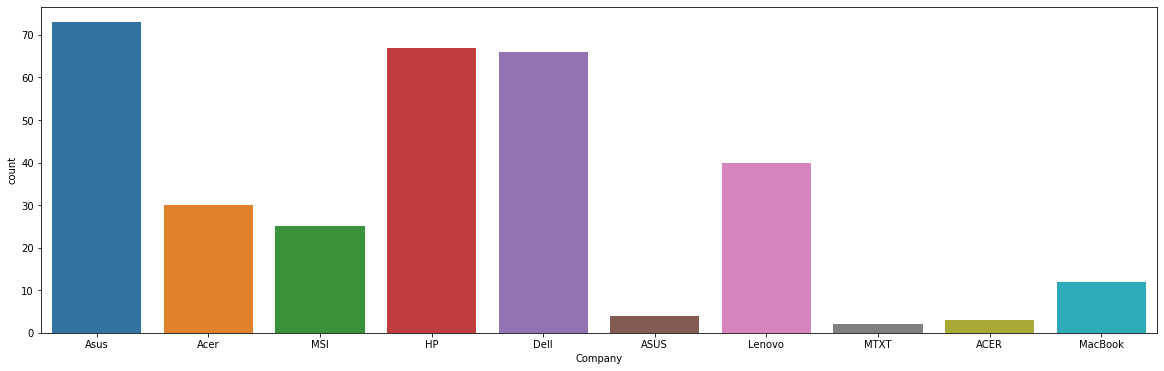

In [13]:
df['Company'].value_counts()
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Company", data=df, ax=ax)

Xem tương quan giữa các thuộc tính.

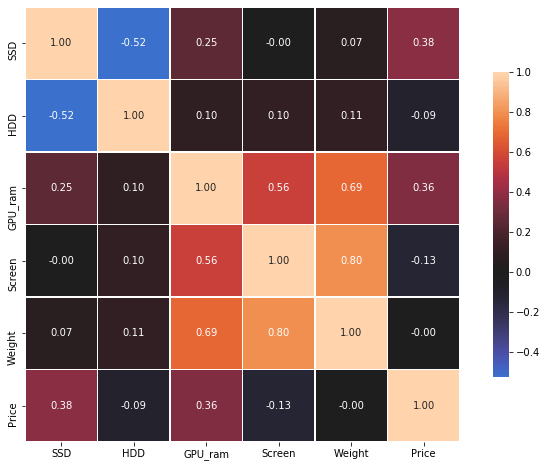

In [14]:
def correlation_heatmap(train):
    correlations = train.corr()
    
    fig, ax = plt.subplots(figsize=(12,8))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.70})
    plt.show()
    
correlation_heatmap(df)

### Giờ ta bắt đầu xây dựng mô hình dự đoán

In [15]:
y = df['Price']
X_df = df.drop(columns='Price')
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.25, random_state=42,shuffle = True)

In [16]:
def get_s(a):
    a = a.split('x')
    return int(a[0].strip())*int(a[1].strip())

def preprocess_df(dataframe):
    new_df = dataframe.copy(deep=False)
    new_df['Bus'] = new_df['Bus'].apply(lambda x: int(x[0:-3]))
    new_df['RAM'] = new_df['RAM'].apply(lambda x: int(x[0:-3]))
    new_df['Độ phân giải'] = new_df['Độ phân giải'].apply(get_s)
    num_cols =['Bus', 'SSD', 'HDD', 'GPU_ram', 'Screen', 'Độ phân giải', 'Weight']
    new_df[num_cols]= new_df[num_cols].apply(pd.to_numeric)
    return new_df

class DataframeFunctionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

In [17]:
cate_cols = ['Company', 'CPU', 'GPU_name']


preprocessor =  make_column_transformer((OneHotEncoder(handle_unknown='ignore'), cate_cols),
                                       )
pipeline = make_pipeline(
    DataframeFunctionTransformer(preprocess_df), preprocessor, StandardScaler(with_mean=False), 
    LinearRegression()
)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)
# apply the pipeline to the input dataframe

0.6396858627088934

In [18]:

pipeline = make_pipeline(
    DataframeFunctionTransformer(preprocess_df), preprocessor, StandardScaler(with_mean=False), 
    LogisticRegression(max_iter=10)
)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

/home/sheepb/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.49382716049382713

In [19]:

pipeline = make_pipeline(
    DataframeFunctionTransformer(preprocess_df), preprocessor, StandardScaler(with_mean=False), 
    RandomForestRegressor()
)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.7051223480234519

In [20]:
pipeline = make_pipeline(
    DataframeFunctionTransformer(preprocess_df), preprocessor, StandardScaler(with_mean=False), 
    SGDRegressor()
)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.6310216129152288

In [21]:
pipeline = make_pipeline(
    DataframeFunctionTransformer(preprocess_df), preprocessor, StandardScaler(with_mean=False), 
    KNeighborsRegressor()
)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.5810010168042647

In [22]:
pipeline = make_pipeline(
    DataframeFunctionTransformer(preprocess_df), preprocessor, StandardScaler(with_mean=False), 
    DecisionTreeRegressor()
)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.7562646094991364

####  Ta thấy mô hình tốt nhất là DecisionTreeRegressor, bây giờ ta mô hình hóa toàn bộ dữ liệu với DecisionTreeRegressor

In [26]:
pipeline = make_pipeline(
    DataframeFunctionTransformer(preprocess_df), preprocessor, StandardScaler(with_mean=False), 
    DecisionTreeRegressor()
)
pipeline.fit(X_df, y)
pred_y = pipeline.predict(X_df).tolist()
'Score:' + str(pipeline.score(X_df, y))

'Score:0.9044701834953403'

In [28]:
pred_df = pd.DataFrame({'Actual':y.tolist(), 'Predict':pred_y})
pred_df

,Actual,Predict
0,22290000.0,22770000.0
1,19090000.0,19090000.0
2,19790000.0,19790000.0
3,19490000.0,19490000.0
4,18790000.0,18790000.0
...,...,...
317,11990000.0,11990000.0
318,11790000.0,11946250.0
319,11790000.0,12790000.0
320,11490000.0,11946250.0
